# Model 15
## Model 8 but many dataprocess

IQR: Çeyrekler arası aralık (IQR), bir veri setinin çeyreklere bölünmesine dayanan bir değişkenlik ölçüsüdür. Çeyreklikler, sıralı bir veri setini dört eşit parçaya böler, böylece her parça verilerin %25'ini içerir. İlk çeyreklik (Q1), en küçük değer ile veri setinin medyanı arasındaki orta değerdir. Üçüncü çeyreklik (Q3), veri setinin ortanca değeri ile en büyük değeri arasındaki orta değerdir. IQR, Q1'den Q3 çıkarılarak hesaplanır.

Aykırı değerler genellikle IQR ile karşılaştırılarak belirlenir. Q1'in 1,5 IQR'den fazla altında veya Q3'ün 1,5 IQR'den fazla üstünde olan bir veri noktası aykırı değer olarak kabul edilir.

Tukey çitleri: Tukey çitleri, aykırı değerlerin belirlenmesinde IQR'ye göre daha muhafazakar bir yaklaşımdır. Q1'den 3 * IQR çıkarılarak ve Q3'e 3 * IQR eklenerek hesaplanırlar. Bu çitlerin dışında kalan tüm veri noktaları aykırı değer olarak kabul edilir.

Mahalanobis mesafesi: Mahalanobis mesafesi, veri setinin kovaryansını dikkate alarak bir veri noktası ile bir veri setinin ortalaması arasındaki mesafenin bir ölçüsüdür. Mahalanobis mesafesi belirli bir eşikten büyük olan bir veri noktası aykırı değer olarak kabul edilir.

Mahalanobis mesafesi için eşik genellikle ki-kare dağılımı kullanılarak hesaplanır. Ki-kare dağılımı, bağımsız standart normal değişkenlerin karelerinin toplamını modellemek için kullanılan bir olasılık dağılımıdır.

Mahalanobis mesafesi, IQR veya Tukey çitlerine göre daha sağlam bir aykırı değer ölçüsüdür. Veri setindeki aykırı değerlere karşı daha az duyarlıdır. Ancak, hesaplanması da hesaplama açısından daha pahalıdır.

Aykırı değerleri belirlemek için en iyi yöntem, belirli veri setine ve analistin ihtiyaçlarına bağlı olacaktır.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [52]:
df_borusan=pd.read_csv(r"C:/Users/denem/OneDrive/Belgeler/AI/BorsnTav4BrulorAtikGz.csv")

In [53]:
df_borusan.head()

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
0,2022-08-25 12:55:00,0.0,0.0000,0.0000,31.51934,2.77160,NaN
1,2022-08-25 13:00:00,0.0,0.0000,0.0000,31.68508,2.37825,NaN
2,2022-08-25 13:05:00,0.0,0.0000,0.0000,31.40884,2.43790,NaN
3,2022-08-25 13:10:00,0.0,0.0942,0.0000,31.29834,2.95775,NaN
4,2022-08-25 13:15:00,0.0,0.0000,0.1332,31.13260,2.56905,NaN


In [54]:
new_df_brs=df_borusan.sort_values("time")

In [55]:
df2_x=new_df_brs["xVRMS"]

In [56]:
df2_x.index = pd.to_datetime(new_df_brs["time"])

In [57]:
df2_x.isnull().sum()

1

In [58]:
df2_x=df2_x.fillna(df2_x.mean())

In [59]:
df2_x.isnull().sum()

0

In [60]:
df2_x.tail()

time
2023-04-16 21:30:00    0.09274
2023-04-16 21:35:00    0.07039
2023-04-16 21:40:00    0.05755
2023-04-16 21:45:00    0.06973
2023-04-16 21:50:00    0.10341
Name: xVRMS, dtype: float64

In [61]:
len(df2_x)

60134

In [62]:
def clean_limit(df_column, low_limit, up_limit=None):
    if up_limit is None:
        filtered = df_column[(df_column >= low_limit)]
        
    else:
        filtered = df_column.loc[(df_column >= low_limit) & (df_column <= up_limit)]
    return filtered

In [63]:
df2_x=clean_limit(df2_x,low_limit=1)

In [64]:
len(df2_x)

35609

In [65]:
df2_x.head()

time
2022-08-25 13:50:00    1.21980
2022-08-29 06:40:00    1.84141
2022-09-08 11:35:00    3.08985
2022-09-08 11:40:00    2.96818
2022-09-08 11:45:00    3.06848
Name: xVRMS, dtype: float64

In [66]:
type(df2_x)

pandas.core.series.Series

## Tukey's fences:

In [67]:
# Calculate the Tukey fences
lower_fence = df2_x.quantile(0.25) - 1.5 * df2_x.std()
upper_fence = df2_x.quantile(0.75) + 1.5 * df2_x.std()

# Identify outliers
outliers =df2_x[(df2_x < lower_fence) | (df2_x > upper_fence)]

# Print the outliers
print(outliers)

time
2022-08-25 13:50:00    1.21980
2022-08-29 06:40:00    1.84141
2022-09-08 13:55:00    1.89430
2022-09-26 18:35:00    7.26000
2022-10-05 19:40:00    6.43460
                        ...   
2023-03-22 09:45:00    3.88747
2023-03-22 10:35:00    3.90929
2023-03-22 11:30:00    4.04677
2023-03-22 17:45:00    3.93444
2023-03-24 11:20:00    3.90862
Name: xVRMS, Length: 1011, dtype: float64


In [68]:
len(outliers),len(df2_x),len(df_borusan)

(1011, 35609, 60134)

In [69]:
df2_x_pd=pd.DataFrame(df2_x)

In [70]:
df2_x_pd.head()

,xVRMS
time,
2022-08-25 13:50:00,1.21980
2022-08-29 06:40:00,1.84141
2022-09-08 11:35:00,3.08985
2022-09-08 11:40:00,2.96818
2022-09-08 11:45:00,3.06848


In [71]:
df2_x_pd=df2_x_pd.drop(outliers.index)
len(df2_x_pd)

34598

In [72]:
df2_x=df2_x_pd["xVRMS"]


In [73]:
type(df2_x)

pandas.core.series.Series

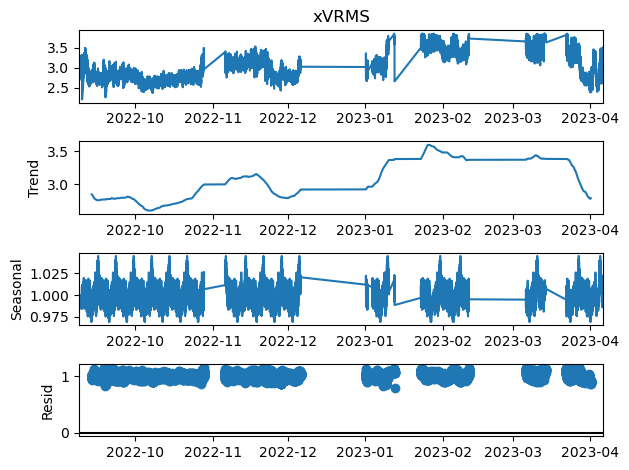

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2_x, model='multiplicative',period=2036)
result.plot()
plt.show()

In [75]:
WINDOW_SIZE=10

In [76]:
def df_to_X_y(df, window_size=5):
  """
  Converts a pandas DataFrame to a tuple of NumPy arrays, where X is the input data and y is the target data.

  Args:
    df: A pandas DataFrame.
    window_size: The size of the sliding window.

  Returns:
    A tuple of NumPy arrays, where X is the input data and y is the target data.
  """

  # Convert the DataFrame to a NumPy array.
  df_as_np = df.to_numpy()

  # Create the input and target data.
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = df_as_np[i:i + window_size]
    X.append(row)
    label = df_as_np[i + window_size]
    y.append(label)

  # Return the input and target data as NumPy arrays.
  return np.array(X), np.array(y)

In [77]:
X,y =df_to_X_y(df2_x,WINDOW_SIZE)
X.shape,y.shape

((34588, 10), (34588,))

In [78]:
total_size = len(X)
train_size = int(total_size * 0.8)
val_size = int(total_size * 0.1)

X_train, y_train = X[:train_size], y[:train_size]  # %80
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]  # %10
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]  # %10

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((27670, 10), (27670,), (3458, 10), (3458,), (3460, 10), (3460,))

In [79]:
type(X_train) ,type(y_train)

(numpy.ndarray, numpy.ndarray)

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [81]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

# Assuming X_train, X_val, and X_test are your input features
# Assuming y_train, y_val, and y_test are your target variables

# Create a MinMaxScaler object for the input features
scaler = MinMaxScaler()

# Fit the scaler on the training input features
scaler.fit(X_train)

# Apply normalization to the input features
X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

# Rest of your code
model15 = Sequential()
model15.add(InputLayer((WINDOW_SIZE, 1)))
model15.add(LSTM(128, return_sequences=True))
model15.add(LSTM(64))
model15.add(Dropout(0.2))
model15.add(Dense(8, activation='relu'))
model15.add(Dense(1, activation='linear'))

# Compile the model
model15.compile(loss='mean_squared_error', optimizer='adam')

# Apply early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model using the normalized input features and target variables
model15.fit(X_train_normalized, y_train, epochs=20, validation_data=(X_val_normalized, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss = model15.evaluate(X_test_normalized, y_test)

# Make predictions using the test set
#y_pred = model15.predict(X_test_normalized)

# Perform any necessary inverse transformations on the predictions or further analysis

Epoch 1/20
865/865 [==============================] - 9s 9ms/step - loss: 0.2272 - val_loss: 0.0128
Epoch 2/20
865/865 [==============================] - 7s 8ms/step - loss: 0.0383 - val_loss: 0.0128
Epoch 3/20
865/865 [==============================] - 7s 8ms/step - loss: 0.0351 - val_loss: 0.0106
Epoch 4/20
865/865 [==============================] - 6s 7ms/step - loss: 0.0317 - val_loss: 0.0097
Epoch 5/20
865/865 [==============================] - 6s 7ms/step - loss: 0.0265 - val_loss: 0.0096
Epoch 6/20
865/865 [==============================] - 6s 7ms/step - loss: 0.0212 - val_loss: 0.0103
Epoch 7/20
865/865 [==============================] - 7s 8ms/step - loss: 0.0153 - val_loss: 0.0095
Epoch 8/20
865/865 [==============================] - 7s 8ms/step - loss: 0.0100 - val_loss: 0.0094
Epoch 9/20
865/865 [==============================] - 7s 8ms/step - loss: 0.0067 - val_loss: 0.0094
Epoch 10/20
865/865 [==============================] - 6s 7ms/step - loss: 0.0054 - val_loss: 0.0107

In [82]:
train_predictions = model15.predict(X_train_normalized).flatten()
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results

865/865 [==============================] - 3s 3ms/step


,Train Predictions,Actuals
0,2.992167,2.93636
1,2.977517,2.96868
2,2.977347,3.05065
3,2.990178,3.07892
4,3.011959,3.09550
...,...,...
27665,3.718567,3.73402
27666,3.719269,3.70112
27667,3.713151,3.66809
27668,3.704130,3.80923


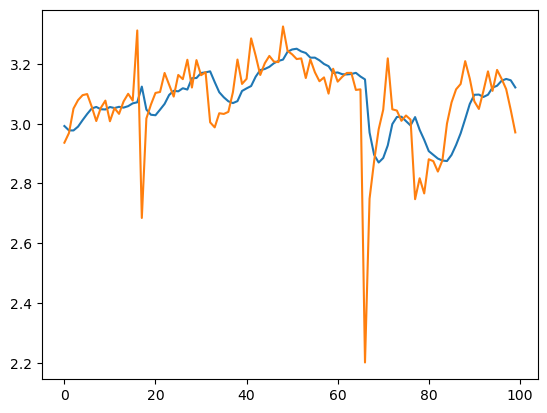

In [83]:
plt.plot(train_results["Train Predictions"][:100])
plt.plot(train_results["Actuals"][:100])

In [84]:
val_predictions=model15.predict(X_val_normalized).flatten()
val_results=pd.DataFrame(data={"Validation Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

109/109 [==============================] - 0s 3ms/step


,Validation Predictions,Actuals
0,3.739465,3.70973
1,3.736994,3.76876
2,3.747454,3.75850
3,3.746716,3.80981
4,3.764712,3.68587
...,...,...
3453,3.558740,3.42023
3454,3.523582,3.64670
3455,3.570282,3.48845
3456,3.537876,3.73471


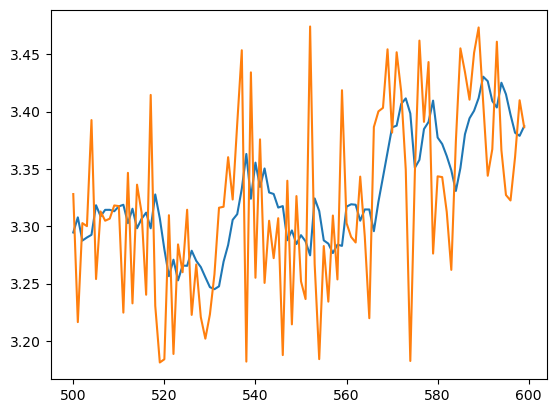

In [85]:
plt.plot(val_results["Validation Predictions"][500:600])
plt.plot(val_results["Actuals"][500:600])

In [86]:
test_predictions=model15.predict(X_test_normalized).flatten()
test_results=pd.DataFrame(data={"Train Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

109/109 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,3.621694,3.42075
1,3.569697,3.67087
2,3.609927,3.36224
3,3.549073,3.57633
4,3.573650,3.47285
...,...,...
3455,3.261540,3.15416
3456,3.240351,3.15994
3457,3.223984,3.13281
3458,3.206514,3.05874


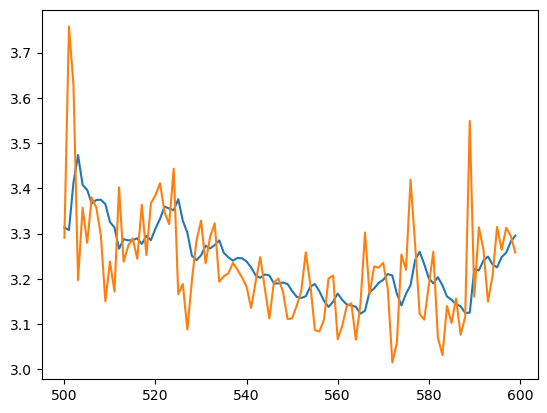

In [87]:
plt.plot(test_results["Train Predictions"][500:600])
plt.plot(test_results["Actuals"][500:600])

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelin tahminlerini alın
y_train_pred = train_predictions
y_val_pred = val_predictions
y_test_pred = test_predictions

# Regresyon metrikleri

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

# R Squared (R^2) Score
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçları yazdırma
print("Regression Metrics:")
print("MAE - Train:", mae_train)
print("MAE - Validation:", mae_val)
print("MAE - Test:", mae_test)
print("MSE - Train:", mse_train)
print("MSE - Validation:", mse_val)
print("MSE - Test:", mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Validation:", rmse_val)
print("RMSE - Test:", rmse_test)
print("R^2 Score - Train:", r2_train)
print("R^2 Score - Validation:", r2_val)
print("R^2 Score - Test:", r2_test)



Regression Metrics:
MAE - Train: 0.04956347678115508
MAE - Validation: 0.07339225103966275
MAE - Test: 0.05909717549686762
MSE - Train: 0.004294561729535443
MSE - Validation: 0.009354707350937104
MSE - Test: 0.006538506705637945
RMSE - Train: 0.06553290570038416
RMSE - Validation: 0.09671973609836362
RMSE - Test: 0.08086103329563595
R^2 Score - Train: 0.9517863261676173
R^2 Score - Validation: 0.6277484957842816
R^2 Score - Test: 0.9327803976142285


In [89]:
df2_x.head()

time
2022-09-08 11:35:00    3.08985
2022-09-08 11:40:00    2.96818
2022-09-08 11:45:00    3.06848
2022-09-08 11:50:00    3.02814
2022-09-08 11:55:00    3.06044
Name: xVRMS, dtype: float64

In [90]:
df2_x.isnull().sum()

0

In [91]:
# Tahmin yapma
last_window = X_test[-1]  # Son pencereyi alın
next_value_normalized = model15.predict(np.expand_dims(last_window, axis=0))[0][0]  # Tahmin yapın
next_value = next_value_normalized * np.max(y_train)  # Tahmini gerçek değere dönüştürün

# Tahmin sonucunu yazdırma
print("Bir sonraki tahmin:")
print("Değer:", next_value)

1/1 [==============================] - 0s 13ms/step
Bir sonraki tahmin:
Değer: 19.61573623939514


In [92]:
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_val.shape:", X_val.shape)
print("y_val.shape:", y_val.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)
print("type(X_train):", type(X_train))
print("type(y_train):", type(y_train))


X_train.shape: (27670, 10)
y_train.shape: (27670,)
X_val.shape: (3458, 10)
y_val.shape: (3458,)
X_test.shape: (3460, 10)
y_test.shape: (3460,)
type(X_train): <class 'numpy.ndarray'>
type(y_train): <class 'numpy.ndarray'>


In [100]:
X_test[-1]

array([3.51044, 3.43895, 3.28521, 3.08522, 3.17085, 3.20599, 3.15416,
       3.15994, 3.13281, 3.05874])

In [102]:
len(X_test[1])

10

In [118]:
def predict_next_value(model, X_test, y_train):
  """Predicts the next value in a time series using a given model.

  Args:
    model: The model to use for prediction.
    X_test: The test data.
    y_train: The training data.

  Returns:
    A list of predicted values.
  """

  predictions = []
  current_window = X_test[-1]

  for _ in range(20):
    next_value_normalized = model.predict(np.expand_dims(current_window, axis=0))[0][0]
    #next_value = next_value_normalized * np.max(y_train)
    #next_value = next_value_normalized /np.max(y_train)
    predictions.append(next_value_normalized)
    current_window = np.append(current_window[1:], next_value_normalized)

  return predictions


predictions = predict_next_value(model15, X_test, y_train)




1/1 [==============================] - 0s 13ms/step


In [119]:
predictions

[5.089286,
 5.599883,
 5.559205,
 5.6395617,
 5.6407766,
 5.6482162,
 5.644699,
 5.641529,
 5.637437,
 5.633958,
 5.631299,
 5.6301985,
 5.6299543,
 5.629751,
 5.6296825,
 5.6296577,
 5.629657,
 5.6296673,
 5.629676,
 5.6296844]

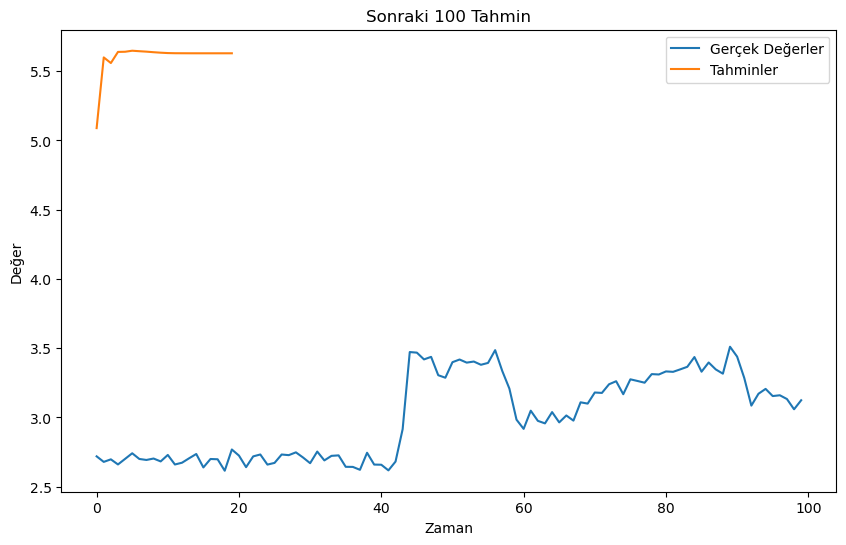

In [120]:
import matplotlib.pyplot as plt

# Tahminleri grafik üzerinde gösterme
plt.figure(figsize=(10, 6))
plt.plot(y_test[-100:], label='Gerçek Değerler')
plt.plot(predictions, label='Tahminler')
plt.xlabel('Zaman')
plt.ylabel('Değer')
plt.title('Sonraki 100 Tahmin')
plt.legend()
plt.show()


## Mahalanobis distance:

In [81]:
df2_x=pd.DataFrame(df2_x)
df2_x.head()

,xVRMS
time,
2022-08-25 13:50:00,1.21980
2022-08-29 06:40:00,1.84141
2022-09-08 11:35:00,3.08985
2022-09-08 11:40:00,2.96818
2022-09-08 11:45:00,3.06848


In [83]:
# Calculate the Mahalanobis distance
distances = pd.Series([np.linalg.norm(df2_x - df2_x.mean()) for i in range(len(df2_x))])

# Reindex the boolean Series to match the index of the indexed object
distances = distances.reindex(df2_x.index)

# Identify outliers
outliers = df2_x[distances > 3 * np.std(df2_x['xVRMS'])]

# Print the outliers
print(outliers)


Empty DataFrame
Columns: [xVRMS]
Index: []


In [84]:
# Calculate the Mahalanobis distance
distances = pd.Series([np.linalg.norm(df2_x - df2_x.mean()) for i in range(len(df2_x))])

# Identify outliers
outliers = df2_x[distances > 3 * np.std(df2_x['xVRMS'])].index

# Print the outliers
print(outliers)

C:\Users\denem\AppData\Local\Temp\ipykernel_18356\3776039636.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df2_x[distances > 3 * np.std(df2_x['xVRMS'])].index


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

## Z-skor

In [57]:
import pandas as pd
import numpy as np


# Calculate the z-scores
z_scores = np.abs(df2_x - df2_x.mean()) / df2_x.std()

# Identify the outliers
outliers = z_scores > 3

# Remove the outliers
df2_x = df2_x[~outliers]
len(df2_x)


35088

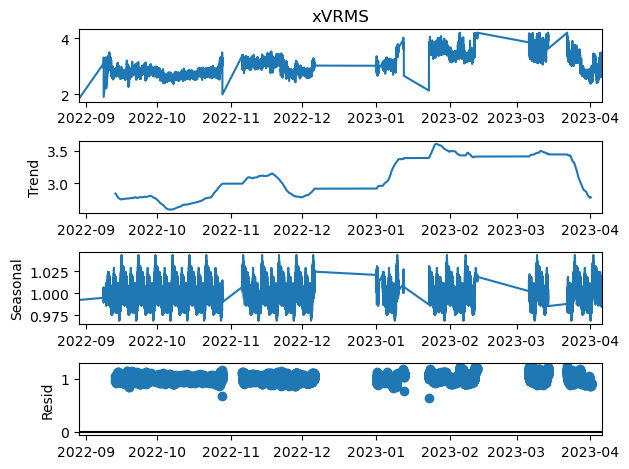

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2_x, model='multiplicative',period=2036)
result.plot()
plt.show()

In [59]:
def df_to_X_y(df, window_size=5):
  """
  Converts a pandas DataFrame to a tuple of NumPy arrays, where X is the input data and y is the target data.

  Args:
    df: A pandas DataFrame.
    window_size: The size of the sliding window.

  Returns:
    A tuple of NumPy arrays, where X is the input data and y is the target data.
  """

  # Convert the DataFrame to a NumPy array.
  df_as_np = df.to_numpy()

  # Create the input and target data.
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = df_as_np[i:i + window_size]
    X.append(row)
    label = df_as_np[i + window_size]
    y.append(label)

  # Return the input and target data as NumPy arrays.
  return np.array(X), np.array(y)

In [60]:
WINDOW_SIZE=10

In [61]:
X,y =df_to_X_y(df2_x,WINDOW_SIZE)
X.shape,y.shape

((35078, 10), (35078,))

In [62]:
total_size = len(X)
train_size = int(total_size * 0.8)
val_size = int(total_size * 0.1)

X_train, y_train = X[:train_size], y[:train_size]  # %80
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]  # %10
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]  # %10

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((28062, 10), (28062,), (3507, 10), (3507,), (3509, 10), (3509,))

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [64]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

# Assuming X_train, X_val, and X_test are your input features
# Assuming y_train, y_val, and y_test are your target variables

# Create a MinMaxScaler object for the input features
scaler = MinMaxScaler()

# Fit the scaler on the training input features
scaler.fit(X_train)

# Apply normalization to the input features
X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

# Rest of your code
model17 = Sequential()
model17.add(InputLayer((WINDOW_SIZE, 1)))
model17.add(LSTM(128, return_sequences=True))
model17.add(LSTM(64))
model17.add(Dropout(0.2))
model17.add(Dense(8, activation='relu'))
model17.add(Dense(1, activation='linear'))

# Compile the model
model17.compile(loss='mean_squared_error', optimizer='adam')

# Apply early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model using the normalized input features and target variables
model17.fit(X_train_normalized, y_train, epochs=20, validation_data=(X_val_normalized, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss = model17.evaluate(X_test_normalized, y_test)

# Make predictions using the test set
#y_pred = model16.predict(X_test_normalized)

# Perform any necessary inverse transformations on the predictions or further analysis

Epoch 1/20
877/877 [==============================] - 10s 8ms/step - loss: 0.3188 - val_loss: 0.3753
Epoch 2/20
877/877 [==============================] - 6s 7ms/step - loss: 0.0609 - val_loss: 0.0252
Epoch 3/20
877/877 [==============================] - 7s 8ms/step - loss: 0.0393 - val_loss: 0.0254
Epoch 4/20
877/877 [==============================] - 6s 7ms/step - loss: 0.0369 - val_loss: 0.0202
Epoch 5/20
877/877 [==============================] - 7s 8ms/step - loss: 0.0332 - val_loss: 0.0167
Epoch 6/20
877/877 [==============================] - 6s 7ms/step - loss: 0.0293 - val_loss: 0.0188
Epoch 7/20
877/877 [==============================] - 6s 7ms/step - loss: 0.0260 - val_loss: 0.0177
Epoch 8/20
877/877 [==============================] - 7s 8ms/step - loss: 0.0222 - val_loss: 0.0168
Epoch 9/20
877/877 [==============================] - 6s 7ms/step - loss: 0.0188 - val_loss: 0.0205
Epoch 10/20
877/877 [==============================] - 6s 7ms/step - loss: 0.0159 - val_loss: 0.014

In [65]:
train_predictions = model17.predict(X_train_normalized).flatten()
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results

877/877 [==============================] - 2s 2ms/step


,Train Predictions,Actuals
0,2.934468,2.93802
1,2.965994,2.93636
2,2.953762,2.96868
3,2.961238,3.05065
4,2.989748,3.07892
...,...,...
28057,3.338197,3.24358
28058,3.312185,3.35700
28059,3.341176,3.39418
28060,3.378455,3.50507


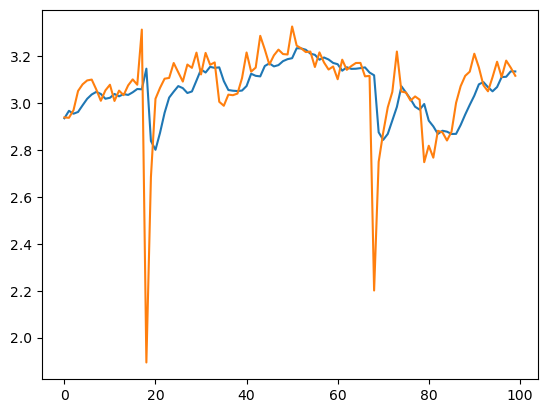

In [66]:
plt.plot(train_results["Train Predictions"][:100])
plt.plot(train_results["Actuals"][:100])

In [67]:
val_predictions=model17.predict(X_val_normalized).flatten()
val_results=pd.DataFrame(data={"Validation Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

110/110 [==============================] - 0s 3ms/step


,Validation Predictions,Actuals
0,3.450379,3.50612
1,3.453907,3.28844
2,3.378331,3.16857
3,3.289517,3.24334
4,3.265302,3.37809
...,...,...
3502,3.670731,3.41989
3503,3.568682,3.51170
3504,3.573768,3.50479
3505,3.550210,3.67199


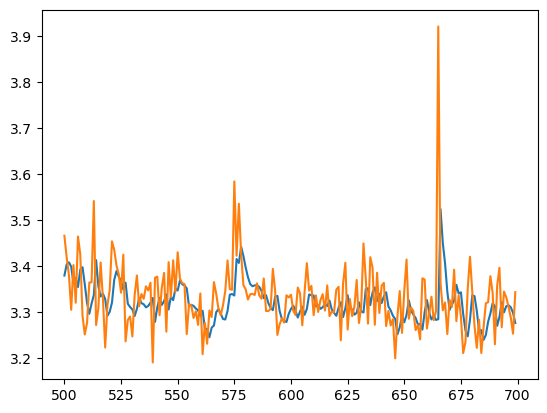

In [73]:
plt.plot(val_results["Validation Predictions"][500:700])
plt.plot(val_results["Actuals"][500:700])

In [69]:
test_predictions=model17.predict(X_test_normalized).flatten()
test_results=pd.DataFrame(data={"Train Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

110/110 [==============================] - 0s 3ms/step


,Train Predictions,Actuals
0,3.573780,3.61985
1,3.593414,3.41078
2,3.525314,3.57736
3,3.525670,3.40631
4,3.481028,3.47348
...,...,...
3504,3.223245,3.15416
3505,3.212064,3.15994
3506,3.201212,3.13281
3507,3.182493,3.05874


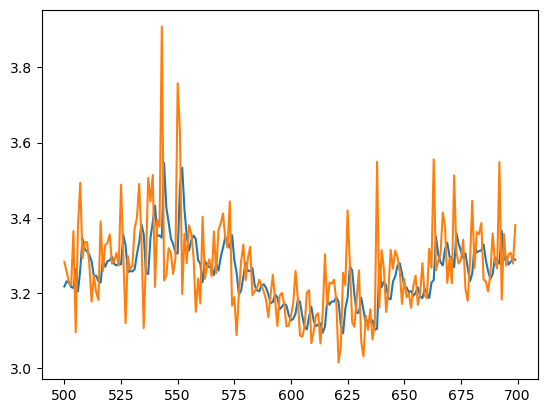

In [72]:
plt.plot(test_results["Train Predictions"][500:700])
plt.plot(test_results["Actuals"][500:700])

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelin tahminlerini alın
y_train_pred = train_predictions
y_val_pred = val_predictions
y_test_pred = test_predictions

# Regresyon metrikleri

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

# R Squared (R^2) Score
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçları yazdırma
print("Regression Metrics:")
print("MAE - Train:", mae_train)
print("MAE - Validation:", mae_val)
print("MAE - Test:", mae_test)
print("MSE - Train:", mse_train)
print("MSE - Validation:", mse_val)
print("MSE - Test:", mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Validation:", rmse_val)
print("RMSE - Test:", rmse_test)
print("R^2 Score - Train:", r2_train)
print("R^2 Score - Validation:", r2_val)
print("R^2 Score - Test:", r2_test)



Regression Metrics:
MAE - Train: 0.05012535800952325
MAE - Validation: 0.08473250586242936
MAE - Test: 0.05917503968222251
MSE - Train: 0.004546127466355403
MSE - Validation: 0.013977788509059228
MSE - Test: 0.006634553253254471
RMSE - Train: 0.06742497657660255
RMSE - Validation: 0.1182276977237535
RMSE - Test: 0.08145276700796893
R^2 Score - Train: 0.9528076138052379
R^2 Score - Validation: 0.7351943262342109
R^2 Score - Test: 0.9341007376702245
